# MNIST database basic approach

In [13]:
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

Download MNIST database in the MNIST_data folder (creates one if not found), extract it and save it using one_hot encoding

In [5]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.train.images.shape

(55000, 784)

In [12]:
single_image=mnist.train.images[1].reshape(28,28)

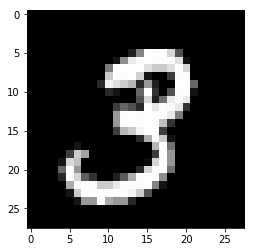

In [14]:
plt.imshow(single_image,cmap='gist_gray')

Note that the dataset is already normalized

In [16]:
print(single_image.max())
print(single_image.min())

1.0
0.0


Time to create softmax regression model

In [23]:
#Placeholders
x=tf.placeholder(tf.float32,shape=[None,784])

In [24]:
#Variables
#can be randomized
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [25]:
#Create Graph Operations
y=tf.matmul(x,W)+b #predictions

In [26]:
#Loss function
y_true=tf.placeholder(tf.float32,[None,10])

In [27]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [28]:
#Optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=optimizer.minimize(cross_entropy)

In [29]:
#Session
init=tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        #tuple unpacking - MNIST dataset has a useful method that splits the dataset in batches
        #usually this is not automatically provided and that's where the difficulties come in
        #most of the time is spent cleaning the data, reshaping it and splitting in order to get batches to feed the model
        batch_x, batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
    #evaluation - tf.equal returns a list of booleans
    correct_prediction=tf.equal(tf.argmax(y,axis=1),tf.argmax(y_true,1))
    
    #[True,False,True,...] -> [1,0,1,...]
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype=tf.float32))

    #predicted [3,4] compared to [3,9](expected)
    #[True,False] -> [1.0,0.0] -> avg([1.0,0.0])=0.5 (accuracy)
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9153
